In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from cosmikyu import config, datasets, transforms, stats, utils
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data_dir = "/home/dwhan89/workspace/cosmikyu/data/sehgal"
def data_path(x):
    return os.path.join(data_dir, x)

model_hist = utils.load_data(data_path("normalized_histogram_modelv2.npz"))
model_pdfcdf = {} 
for key in model_hist:
    total_val = np.sum(model_hist[key]["hist"])
    model_pdfcdf[key] = {"x": model_hist[key]["bin_centers"],
                      "pdf": model_hist[key]["hist"]/total_val,
                      "cdf": np.cumsum(model_hist[key]["hist"]/total_val)}
    
np.savez(data_path("normalized_pdfcdf_modelv2.npz"), **model_pdfcdf)

In [41]:
channel_idxes = ["kappa", "ksz", "tsz", "ir_pts", "rad_pts"]
nchannel = len(channel_idxes)
interpolators = [None]*nchannel
funcs = [None]*nchannel

def f(x, *args):
    y, intp = args
    return intp(x) - y
fsolve_wrapper = lambda y, intp: fsolve(f, 0.,  args=(y, intp))

for i in range(nchannel):
    idx = channel_idxes[i]
    print(i, idx)
    interpolators[i] = interp1d(model_pdfcdf[idx]['x'], model_pdfcdf[idx]['cdf'], bounds_error=False, fill_value=(0,1), assume_sorted=True)

    samplers[i] = lambda y, intp: fsolve(f, 0.,  args=(y, intp))
    

0 kappa
[-0.04852408]
1 ksz
[-0.00272363]
2 tsz
[0.21454381]
3 ir_pts
[-0.03692011]
4 rad_pts
[-0.05322947]


0
1
2
3
4


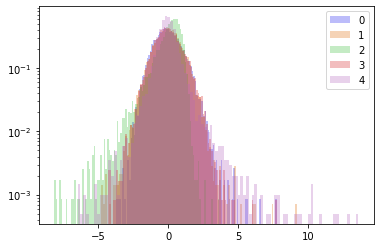

In [46]:
x = np.random.uniform(0,1, 10000)


for j in range(5):
    print(j)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = fsolve_wrapper(x[i], interpolators[j])
    plt.hist(y, bins=100, density=True, alpha=0.3, label=j)
plt.yscale("log")
plt.legend()

(array([4.50323654e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.50323654e-04, 4.50323654e-04, 4.50323654e-04, 4.50323654e-04,
        4.50323654e-04, 0.00000000e+00, 9.00647307e-04, 0.00000000e+00,
        0.00000000e+00, 1.80129461e-03, 9.00647307e-04, 2.70194192e-03,
        2.25161827e-03, 1.35097096e-03, 2.70194192e-03, 3.15226558e-03,
        2.70194192e-03, 5.85420750e-03, 8.10582577e-03, 9.90712038e-03,
        1.03574440e-02, 9.45679673e-03, 1.80129461e-02, 2.16155354e-02,
        3.19729794e-02, 4.27807471e-02, 8.73627888e-02, 1.27441594e-01,
        2.06248233e-01, 3.55305363e-01, 5.40838708e-01, 6.34055704e-01,
        6.64677713e-01, 5.72361364e-01, 3.87278342e-01, 2.43625097e-01,
        1.45454540e-01, 8.78131125e-02, 5.98930459e-02, 4.00788052e-02,
        2.79200665e-02, 2.02645644e-02, 1.75626225e-02, 1.35097096e-02,
        1.17084150e-02, 1.08077677e-02, 8.10582577e-03, 1.03574440e-02,
        6.30453115e-03, 4.50323654e-03, 4.05291288e-03, 4.503236

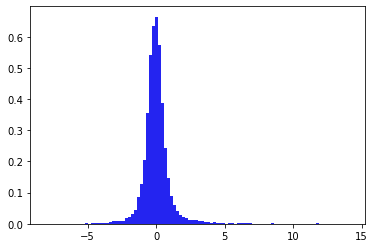

In [148]:

#plt.plot(model_pdfcdf[key]["x"], model_pdfcdf[key]["pdf"])

In [137]:
plt.hist??